# **IMPORT LIBRARIES AND DATASET**

## *1. Import libraries*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## *2. Import dataset*

In [ ]:
#Setting Working directory
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Kaggle/Customer_churn

#Import the dataset (df)
df=pd.read_csv("training_set.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Kaggle/Customer_churn


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis (EDA)

## *1. Dataset Features*

In this part, I am going to check the number of categorical, numerical, etc of the dataset

In term of the target, I am going to check the balance between two classes, in this case, column Churn with Yes/ No

In [ ]:
#Dataset- predictors
print("DATASET")
print('--'*40)
df.info()
print('--'*40)
print('COLUMNS, ROWS', df.shape)
print('--'*40)
df.columns
print('--'*40)
df.describe()

DATASET
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


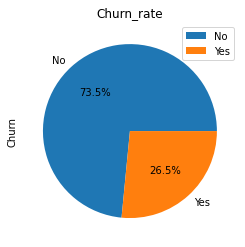

In [ ]:
#Dataset- target
df['Churn'].value_counts().plot(kind="pie",autopct='%1.1f%%',title="Churn_rate")
plt.legend(("No","Yes"))
#The dataset is not too imbalance to be needed adjustment

## *2.Data check, clean*

**Features may have typos and errors**

We will review a few random samples from the dataset, which features may required correcting.

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
577,8270-RKSAP,Male,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.50,597.9,No
4318,4369-NYSCF,Male,0,No,No,56,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),75.75,4284.65,No
5033,7298-IZWLY,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.4,No
5318,2498-XLDZR,Female,0,Yes,Yes,32,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Mailed check,73.60,2316.85,No
4151,7733-UDMTP,Female,1,No,No,57,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,55.00,3094.05,No
434,6048-NJXHX,Male,0,Yes,No,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,19.75,899.45,No
1114,3312-UUMZW,Male,0,Yes,No,32,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),98.85,3145.9,No
4976,8165-CBKXO,Male,0,Yes,Yes,66,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),56.75,3708.4,No
6742,1960-UOTYM,Male,0,Yes,Yes,52,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,79.20,4016.3,No
2788,2790-XUYMV,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Credit card (automatic),85.45,6028.95,No


**Handle missing data**

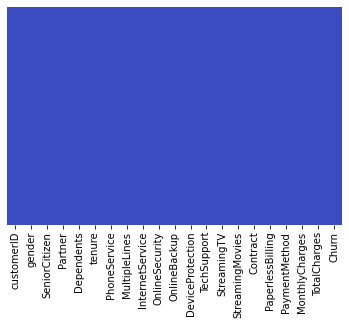

In [ ]:
#Use heatmap to have a inititally visual look of missing data distribution
sns.heatmap(df.isnull(),yticklabels=False,cmap="coolwarm",cbar=False)


In [ ]:
#The column dtype of total charges is object, it may contain some blank values. Let's check blank value in each column.
for i in df.columns:
  print(i,"-----",df[df[i]==' '].index)
  

customerID ----- Int64Index([], dtype='int64')
gender ----- Int64Index([], dtype='int64')
SeniorCitizen ----- Int64Index([], dtype='int64')
Partner ----- Int64Index([], dtype='int64')
Dependents ----- Int64Index([], dtype='int64')
tenure ----- Int64Index([], dtype='int64')
PhoneService ----- Int64Index([], dtype='int64')
MultipleLines ----- Int64Index([], dtype='int64')
InternetService ----- Int64Index([], dtype='int64')
OnlineSecurity ----- Int64Index([], dtype='int64')
OnlineBackup ----- Int64Index([], dtype='int64')
DeviceProtection ----- Int64Index([], dtype='int64')
TechSupport ----- Int64Index([], dtype='int64')
StreamingTV ----- Int64Index([], dtype='int64')
StreamingMovies ----- Int64Index([], dtype='int64')
Contract ----- Int64Index([], dtype='int64')
PaperlessBilling ----- Int64Index([], dtype='int64')
PaymentMethod ----- Int64Index([], dtype='int64')
MonthlyCharges ----- Int64Index([], dtype='int64')
TotalCharges ----- Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380,

In [ ]:
#It is true that total charges contain blank value. we will fill those blank rows with the median
df_blank= df[df['TotalCharges']==' ']
df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],inplace=True)

In [ ]:
df['TotalCharges']=df['TotalCharges'].astype('float64')
df.info()
df_blank['TotalCharges']=df['TotalCharges'].median()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_blank

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1397.475,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1397.475,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1397.475,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1397.475,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1397.475,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,1397.475,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.475,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.475,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.475,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1397.475,No


In [ ]:
df1=pd.concat([df,df_blank],axis=0)
df1['TotalCharges']=df1['TotalCharges'].astype('float')
df1.drop('customerID',axis=1,inplace=True)
print(df1.info())
df1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 6754
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.650,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.475,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.475,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.475,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1397.475,No


**Check unique values**

In [ ]:
print(df1.nunique())

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
#Find unique values in categorical predictors
#Step1: take all categorical predictors out
categorical_pred= df1.select_dtypes('object')
print(categorical_pred.columns)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
#Step 3: Check unique values in categorical predictors
for i in categorical_pred.columns:
  print("({}) Unique_Value {} {}".format(i,df[i].nunique(),df[i].unique()))


(gender) Unique_Value 2 ['Female' 'Male']
(Partner) Unique_Value 2 ['Yes' 'No']
(Dependents) Unique_Value 2 ['No' 'Yes']
(PhoneService) Unique_Value 2 ['No' 'Yes']
(MultipleLines) Unique_Value 3 ['No phone service' 'No' 'Yes']
(InternetService) Unique_Value 3 ['DSL' 'Fiber optic' 'No']
(OnlineSecurity) Unique_Value 3 ['No' 'Yes' 'No internet service']
(OnlineBackup) Unique_Value 3 ['Yes' 'No' 'No internet service']
(DeviceProtection) Unique_Value 3 ['No' 'Yes' 'No internet service']
(TechSupport) Unique_Value 3 ['No' 'Yes' 'No internet service']
(StreamingTV) Unique_Value 3 ['No' 'Yes' 'No internet service']
(StreamingMovies) Unique_Value 3 ['No' 'Yes' 'No internet service']
(Contract) Unique_Value 3 ['Month-to-month' 'One year' 'Two year']
(PaperlessBilling) Unique_Value 2 ['Yes' 'No']
(PaymentMethod) Unique_Value 4 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
(Churn) Unique_Value 2 ['No' 'Yes']


## *3.Visualize dataset correlation*

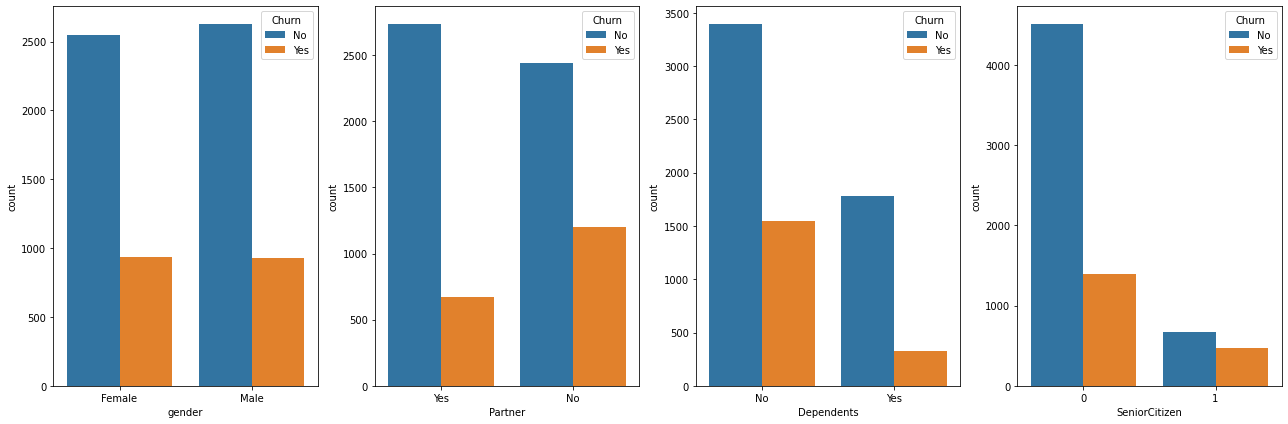

In [ ]:
#Demographic information: Gender, Partner, Dependents,SeniorCitizen
fig, axes = plt.subplots(ncols=4,nrows=1,figsize=(18,6))

for ax, feat in zip(axes, df1[['gender','Partner','Dependents','SeniorCitizen']]):
        sns.countplot(x=feat, hue='Churn', data=df1, ax=ax)
        fig.tight_layout()

plt.show()

It can be seen that, 
- Gender is not useful to predict the churn rate in this case 
- If person has a partner, It is less chance for them to give up on the service.
- If a person has dependents, It is may less chance for them to give up on the service.
- If a person is a senior, It is higher chance for them to give up on the service


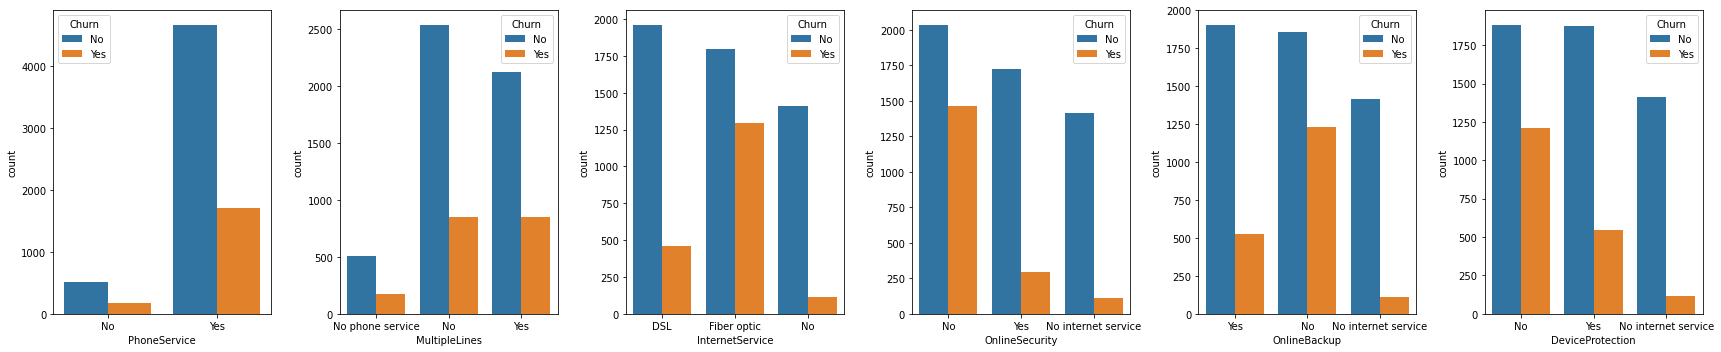

In [ ]:
#Service information: 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 
#'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'
fig, axes = plt.subplots(ncols=6,nrows=1,figsize=(24,5))

for ax, feat in zip(axes, df1[['PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection']]):
        sns.countplot(x=feat, hue='Churn', data=df1, ax=ax)
        fig.tight_layout()

plt.show()


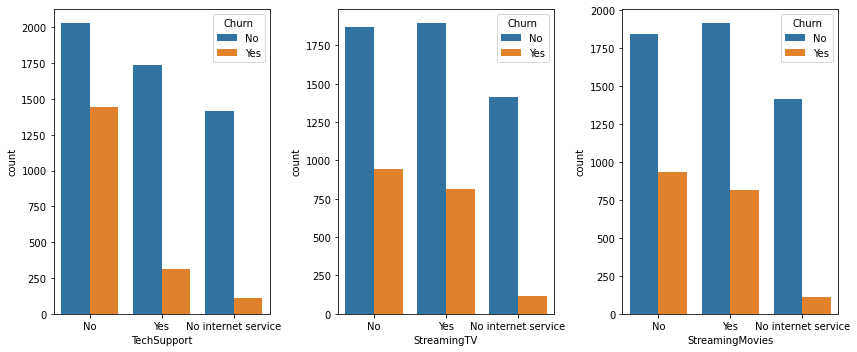

In [ ]:
fig, axes = plt.subplots(ncols=3,nrows=1,figsize=(12,5))

for ax, feat in zip(axes, df1[['TechSupport', 'StreamingTV', 'StreamingMovies']]):
  
        sns.countplot(x=feat, hue='Churn', data=df1, ax=ax)
        fig.tight_layout()

plt.show()

- People with Fiber Optic Internet Service, No online security, no online backup, no devide protection, no tech suport have more chance to port out the service (churn)
- People with no internet service are less likely to port out

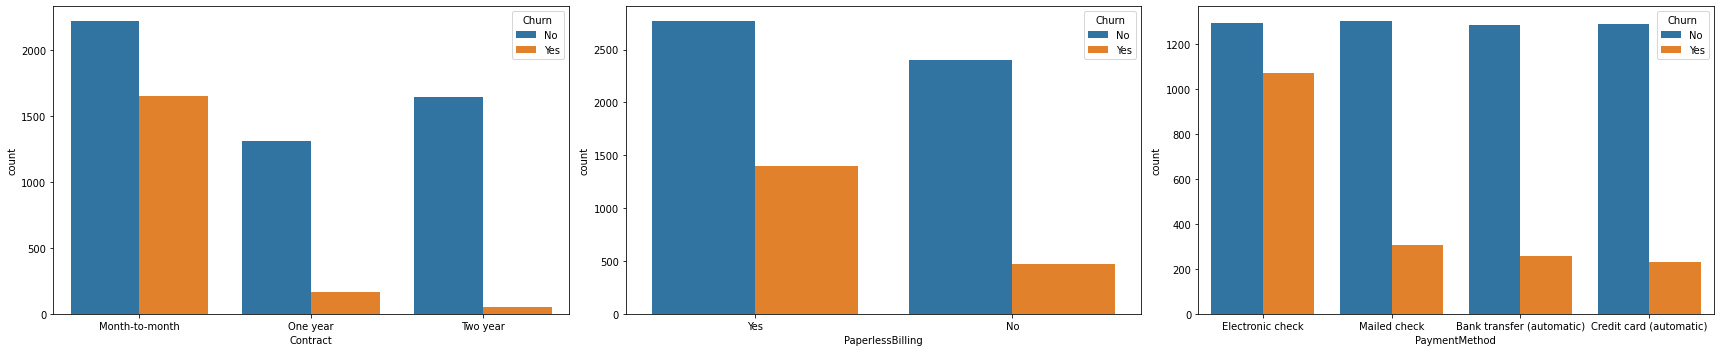

In [ ]:
#Payment information: 'Contract','PaperlessBilling', 'PaymentMethod'
fig, axes = plt.subplots(ncols=3,nrows=1,figsize=(24,5))

for ax, feat in zip(axes, df1[['Contract','PaperlessBilling', 'PaymentMethod']]):
  
        sns.countplot(x=feat, hue='Churn', data=df1, ax=ax)
        fig.tight_layout()

plt.show()


- Person with month-to-month payment has a much higher chance to quit the service
- Person with paperless billing and electronic check has a higher chance to quit the service

## *4. Data transformation & Partition*

**Data Transformation**

- Binary Predictors: 'gender'(Male=1-Female=0),'Partner','Dependents', 'PhoneService', 'PayperlessBilling' will be transformed into No= 0- Yes=1
- Categorical predictors: 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamTV','StreamMovies','Contract', 'PaymentMethod' - using one-hot label encoding
- Target: 'Churn' will be transform into 0-1

*Binary Predictors*

In [ ]:
binary_predictor=df1[['gender','Partner','Dependents', 'PhoneService', 'PaperlessBilling']]
binary_predictor

,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,Female,Yes,No,No,Yes
1,Male,No,No,Yes,No
2,Male,No,No,Yes,Yes
3,Male,No,No,No,No
4,Female,No,No,Yes,Yes
...,...,...,...,...,...
3826,Male,Yes,Yes,Yes,No
4380,Female,Yes,Yes,Yes,No
5218,Male,Yes,Yes,Yes,Yes
6670,Female,Yes,Yes,Yes,No


In [ ]:
binary_predictor['gender'].replace(['Male','Female'],[1,0],inplace=True)
binary_predictor


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,0,Yes,No,No,Yes
1,1,No,No,Yes,No
2,1,No,No,Yes,Yes
3,1,No,No,No,No
4,0,No,No,Yes,Yes
...,...,...,...,...,...
3826,1,Yes,Yes,Yes,No
4380,0,Yes,Yes,Yes,No
5218,1,Yes,Yes,Yes,Yes
6670,0,Yes,Yes,Yes,No


In [ ]:
for i in binary_predictor[['Partner','Dependents', 'PhoneService', 'PaperlessBilling']]:
  binary_predictor[i].replace(['Yes','No'],[1,0],inplace=True)

binary_predictor

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,1
3,1,0,0,0,0
4,0,0,0,1,1
...,...,...,...,...,...
3826,1,1,1,1,0
4380,0,1,1,1,0
5218,1,1,1,1,1
6670,0,1,1,1,0


*Categorical Predictors*

In [ ]:

categorical_predictor=df1[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaymentMethod']]
categorical_predictor

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...
3826,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check
4380,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check
5218,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Mailed check
6670,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,Mailed check


In [ ]:
categorical_predictor=pd.get_dummies(categorical_predictor)
categorical_predictor

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4380,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
5218,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
6670,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1


*Target*

In [ ]:
df1['Churn'].replace(['Yes','No'],[1,0],inplace=True)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.475,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.475,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.475,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1397.475,0


In [ ]:
df2=pd.concat([binary_predictor,categorical_predictor,
               df1[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges','Churn']]],axis=1)
df2

,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,29.85,29.850,0
1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,34,0,56.95,1889.500,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,2,0,53.85,108.150,1
3,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,45,0,42.30,1840.750,0
4,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,2,0,70.70,151.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,25.35,1397.475,0
4380,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,20.00,1397.475,0
5218,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,19.70,1397.475,0
6670,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,73.35,1397.475,0


In [ ]:
df2.reset_index(inplace=True,drop=True)
df2

,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,29.85,29.850,0
1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,34,0,56.95,1889.500,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,2,0,53.85,108.150,1
3,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,45,0,42.30,1840.750,0
4,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,2,0,70.70,151.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,25.35,1397.475,0
7039,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,20.00,1397.475,0
7040,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,19.70,1397.475,0
7041,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,73.35,1397.475,0


**Data Partition**

Split the data into train set and test set with ratio of 70-30

In [ ]:
X= df2.iloc[:,:-1]
y= df2.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)

# **Build models and Model Evaluation**

In this section, I will build Logistic Regression, Random Forest and XGBoost Classifier Models to predict customer churn.
In term of model evaluation, I will use classification report and ROC curve with AUC.

In [ ]:
#Import models: logistic regression, random forest, xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Import evaluation metrics:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve



## *1. Logistic Regression*

In [ ]:
log_model= LogisticRegression()
log_model.fit(X_train,y_train)
log_pred=log_model.predict(X_test)

In [ ]:
print(classification_report(y_test,log_pred))
print('---'*30)
print(confusion_matrix(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1582
           1       0.62      0.56      0.59       531

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113

------------------------------------------------------------------------------------------
[[1403  179]
 [ 236  295]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


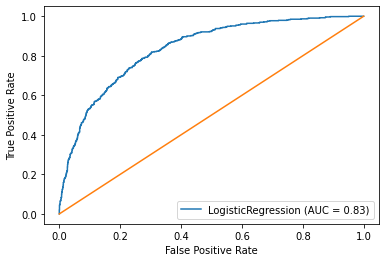

In [ ]:
plot_roc_curve(log_model,X_test,y_test)
sns.lineplot([0,1],[0,1])

## *2. Random Forest*

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_pred))
print('---'*30)
print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1582
           1       0.59      0.47      0.52       531

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.78      2113

------------------------------------------------------------------------------------------
[[1410  172]
 [ 283  248]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


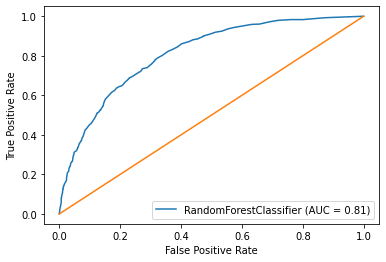

In [ ]:
plot_roc_curve(rf_model,X_test,y_test)
sns.lineplot([0,1],[0,1])

## *3. XGBOOST*

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred=xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test,xgb_pred))
print('---'*30)
print(confusion_matrix(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1582
           1       0.63      0.55      0.59       531

    accuracy                           0.81      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113

------------------------------------------------------------------------------------------
[[1408  174]
 [ 237  294]]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


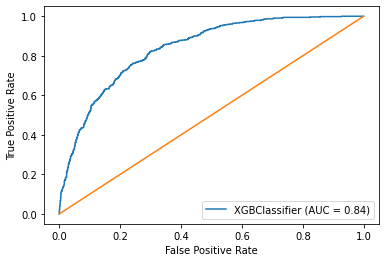

In [ ]:
plot_roc_curve(xgb_model,X_test,y_test)
sns.lineplot([0,1],[0,1])

As you can see, 3 models give us somewhat the same quality. 